In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("data.csv")
print("type(df)-->",type(df))

df.head(-10)

type(df)--> <class 'pandas.core.frame.DataFrame'>


,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
0,United States,55.3,107390107.0,2000,194331436,210623408,7.7,1377013,2339388,536039,3082746
1,Alabama,NaN,NaN,2000,3241682,3334576,1.5,26225,40178,5484,51798
2,Alaska,68.7,287825.0,2000,419111,440296,3.4,4173,4779,525,7088
3,Arizona,46.4,1559520.0,2000,3357701,3816498,10.3,26510,59810,3474,59889
4,Arkansas,NaN,NaN,2000,1925961,2001774,2.3,11915,28409,8659,34779
...,...,...,...,...,...,...,...,...,...,...,...
609,Oklahoma*,39.6,1153284.0,2022,2913333,3080502,4.1,22071,15889,2237,40197
610,Oregon,62.3,1997689.0,2022,3208133,3409264,5.5,12753,0,0,12753
611,Pennsylvania*,54.4,5410022.0,2022,9953327,10366708,3.6,38938,0,0,38938
612,Rhode Island*,43.6,361449.0,2022,828495,890835,6.7,2227,0,0,2227


In [3]:
df = df[~df.apply(lambda row: row.astype(str).str.contains("United States", case=False)).any(axis=1)]
df.head(10)

,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
1,Alabama,NaN,NaN,2000,3241682,3334576,1.5,26225,40178,5484,51798
2,Alaska,68.7,287825.0,2000,419111,440296,3.4,4173,4779,525,7088
3,Arizona,46.4,1559520.0,2000,3357701,3816498,10.3,26510,59810,3474,59889
4,Arkansas,NaN,NaN,2000,1925961,2001774,2.3,11915,28409,8659,34779
5,California,56.6,11142843.0,2000,19685258,24867252,18.8,163001,0,117647,280648
6,Colorado,NaN,NaN,2000,3026316,3246521,6.7,16833,0,5500,22333
7,Connecticut,62.5,1474103.0,2000,2357687,2575243,6.6,18355,47636,1868,44041
8,Delaware,NaN,NaN,2000,554863,594256,3.9,6921,20052,579,17526
9,District of Columbia,NaN,NaN,2000,416696,458301,10.2,7456,0,0,7456
10,Florida,57.5,6138765.0,2000,10667193,12475387,10.4,71319,296139,5982,225371


In [4]:
nan_counts = df.isna().sum()
print(nan_counts)

State                                0
Voter Turnout                       62
Total Ballots                       62
Year                                 0
Voting-Eligible Population (VEP)     0
Voting-Age Population (VAP)          0
 Non-citizen                         0
Prison                               0
Probation                            0
Parole                               0
Total Ineligible Felon               0
dtype: int64


In [5]:
columns_to_modify = ['Total Ballots', 'Voter Turnout', 'Voting-Eligible Population (VEP)']  

for column in columns_to_modify:

    col_mean = df[column].mean(skipna=True)
    col_std = df[column].std(skipna=True)
    
    df.loc[1:, column] = (df.loc[1:, column] - col_mean) / col_std

print(df)

             State  Voter Turnout  Total Ballots  Year  \
1          Alabama            NaN            NaN  2000   
2           Alaska       1.303009      -0.817392  2000   
3          Arizona      -0.667620      -0.285677  2000   
4         Arkansas            NaN            NaN  2000   
5       California       0.233744       3.721259  2000   
..             ...            ...            ...   ...   
619       Virginia      -0.561577       0.325790  2022   
620     Washington       0.118864       0.344911  2022   
621  West Virginia      -1.639679      -0.730873  2022   
622     Wisconsin*       0.516525       0.179951  2022   
623        Wyoming      -0.738315      -0.854867  2022   

     Voting-Eligible Population (VEP)  Voting-Age Population (VAP)  \
1                           -0.221326                      3334576   
2                           -0.857129                       440296   
3                           -0.195192                      3816498   
4                      

/var/folders/jf/d_bhrw0x2jj3g33z629_9xnh0000gn/T/ipykernel_8556/563176318.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.21326400e-01 -8.57129297e-01 -1.95192348e-01 -5.17701309e-01
  3.48269850e+00 -2.69839024e-01 -4.20452155e-01 -8.26550256e-01
 -8.57673292e-01  1.45131936e+00  3.18835902e-01 -7.63978688e-01
 -7.53895299e-01  9.47962417e-01  4.52033546e-02 -4.82338492e-01
 -5.17253273e-01 -2.85761966e-01 -2.46423370e-01 -7.33197366e-01
 -1.29433173e-01  6.59591784e-02  6.41185831e-01 -1.61689701e-01
 -4.95470955e-01 -3.87394383e-02 -8.01172391e-01 -6.75782599e-01
 -6.48315253e-01 -7.50918307e-01  3.10303180e-01 -6.73550305e-01
  1.83718738e+00  3.42391666e-01 -8.43871366e-01  9.17100454e-01
 -3.93977065e-01 -4.18939557e-01  1.09534717e+00 -7.81721028e-01
 -2.88307817e-01 -8.27984014e-01 -1.37942912e-02  1.98425137e+00
 -6.29044096e-01 -8.48104840e-01  1.90348831e-01 -2.84251614e-02
 -6.38347871e-01 -8.60

In [6]:
df.describe()

,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
count,5.500000e+02,5.500000e+02,612.000000,6.120000e+02,6.120000e+02,612.000000,612.000000,612.000000,612.000000,612.000000
mean,-6.459479e-18,-5.813531e-17,2011.000000,-4.063561e-17,4.659260e+06,5.556536,24996.498366,41150.482026,9334.647059,57365.959150
std,1.000000e+00,1.000000e+00,6.909753,1.000000e+00,5.219642e+06,3.689673,31417.447333,82086.857088,20568.198985,83716.355099
min,-2.231752e+00,-8.865777e-01,2000.000000,-8.702016e-01,3.666390e+05,0.600000,0.000000,0.000000,0.000000,0.000000
25%,-7.913367e-01,-6.947787e-01,2005.500000,-6.823415e-01,1.263353e+06,2.600000,5822.000000,0.000000,0.000000,10932.500000
50%,7.467987e-02,-2.903486e-01,2011.000000,-2.579075e-01,3.253290e+06,4.400000,17427.500000,12139.500000,2687.000000,32975.500000
75%,7.705860e-01,2.901388e-01,2016.500000,1.917541e-01,5.537238e+06,7.900000,31545.750000,43817.000000,8633.750000,70791.250000
max,2.283906e+00,6.498512e+00,2022.000000,4.903946e+00,3.073060e+07,18.900000,175512.000000,471067.000000,120753.000000,499362.000000


In [7]:
nan_counts = df.isna().sum()
print(nan_counts)

State                                0
Voter Turnout                       62
Total Ballots                       62
Year                                 0
Voting-Eligible Population (VEP)     0
Voting-Age Population (VAP)          0
 Non-citizen                         0
Prison                               0
Probation                            0
Parole                               0
Total Ineligible Felon               0
dtype: int64


In [8]:
columns_to_modify = ['Total Ballots', 'Voter Turnout']  

for column in columns_to_modify:

    col_mean = df[column].mean(skipna=True)
    col_std = df[column].std(skipna=True)
    
    if col_std != 0:  # Avoid division by zero
        stand_value = col_mean / col_std
        df[column] = df[column].fillna(stand_value)


print(df)


             State  Voter Turnout  Total Ballots  Year  \
1          Alabama  -6.459479e-18  -5.813531e-17  2000   
2           Alaska   1.303009e+00  -8.173925e-01  2000   
3          Arizona  -6.676200e-01  -2.856770e-01  2000   
4         Arkansas  -6.459479e-18  -5.813531e-17  2000   
5       California   2.337441e-01   3.721259e+00  2000   
..             ...            ...            ...   ...   
619       Virginia  -5.615772e-01   3.257902e-01  2022   
620     Washington   1.188644e-01   3.449107e-01  2022   
621  West Virginia  -1.639679e+00  -7.308727e-01  2022   
622     Wisconsin*   5.165250e-01   1.799507e-01  2022   
623        Wyoming  -7.383152e-01  -8.548669e-01  2022   

     Voting-Eligible Population (VEP)  Voting-Age Population (VAP)  \
1                           -0.221326                      3334576   
2                           -0.857129                       440296   
3                           -0.195192                      3816498   
4                      

In [9]:
# Splitting the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler


train_data = df[df['Year'] != 2022]  # Exclude 2022 for training
test_data = df[df['Year'] == 2022]   # Use 2022 for testing

# Scaling the target variable
scaler = MinMaxScaler()

# Features and target for training
target_column = 'Voter Turnout'
X_train = train_data.drop(columns=[target_column, 'Year', 'State'])
y_train = train_data[target_column]

# Features and target for testing
X_test = test_data.drop(columns=[target_column, 'Year', 'State'])
y_test = test_data[target_column]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check data splits
print("Training Data Shape:",X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)


Training Data Shape: (561, 8)
Testing Data Shape: (51, 8)


Linear Regression

Linear Regression: MSE = 0.4792, R2 Score = -0.2019


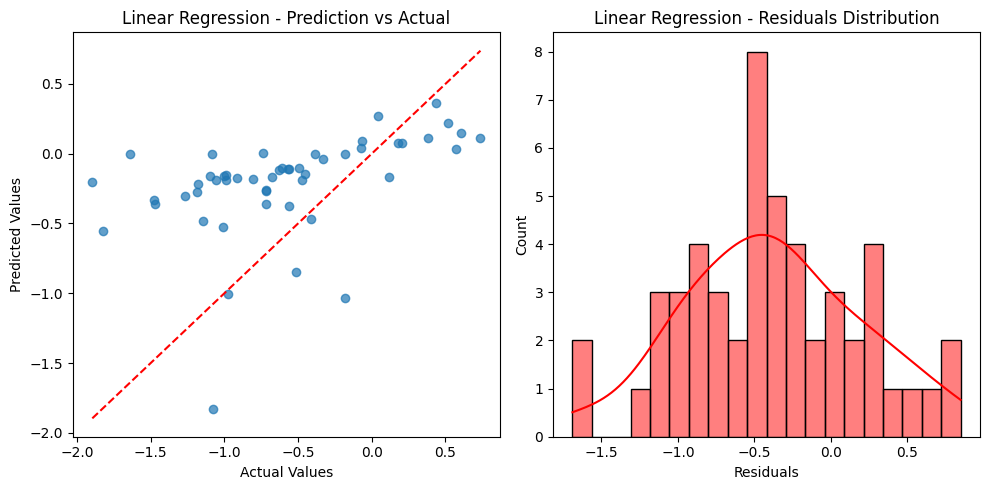

In [10]:

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f"Linear Regression: MSE = {mse_lr:.4f}, R2 Score = {r2_lr:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Linear Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Linear Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()


Ridge Regression

Ridge Regression: MSE = 0.4845, R2 Score = -0.2153


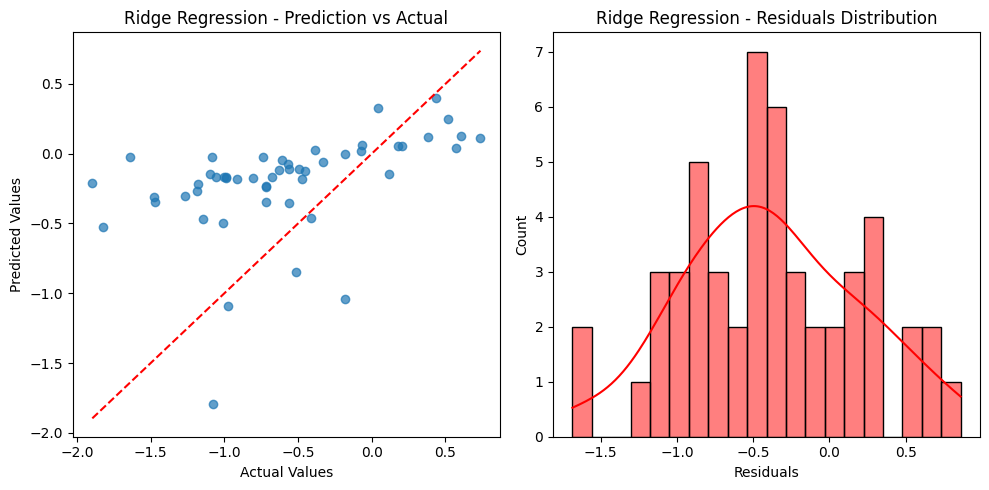

In [11]:
#Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"Ridge Regression: MSE = {mse_ridge:.4f}, R2 Score = {r2_ridge:.4f}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Ridge Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Ridge Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Random Forest Regression


Random Forest Regression: MSE = 0.3724, R2 Score = 0.0661


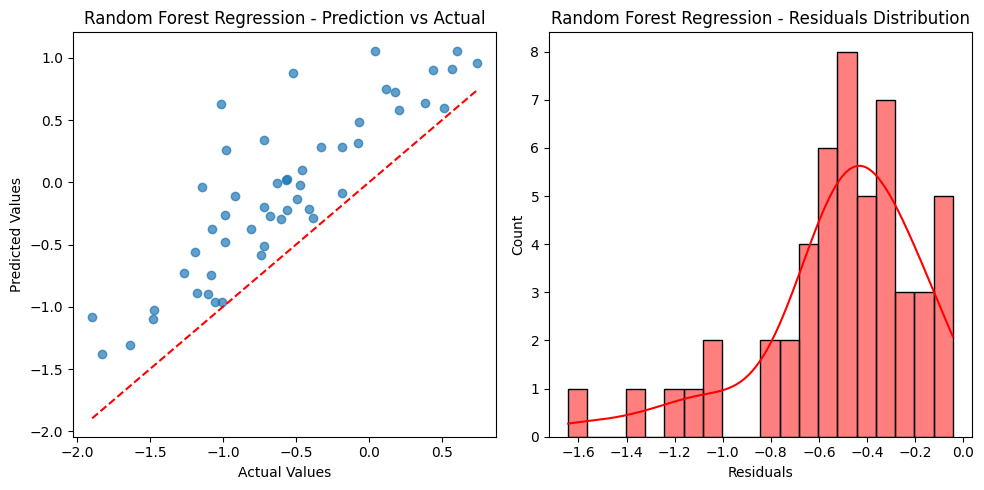

In [12]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Regression: MSE = {mse_rf:.4f}, R2 Score = {r2_rf:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Random Forest Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Decision Tree Regression


Decision Tree Regression: MSE = 0.8413, R2 Score = -1.1102


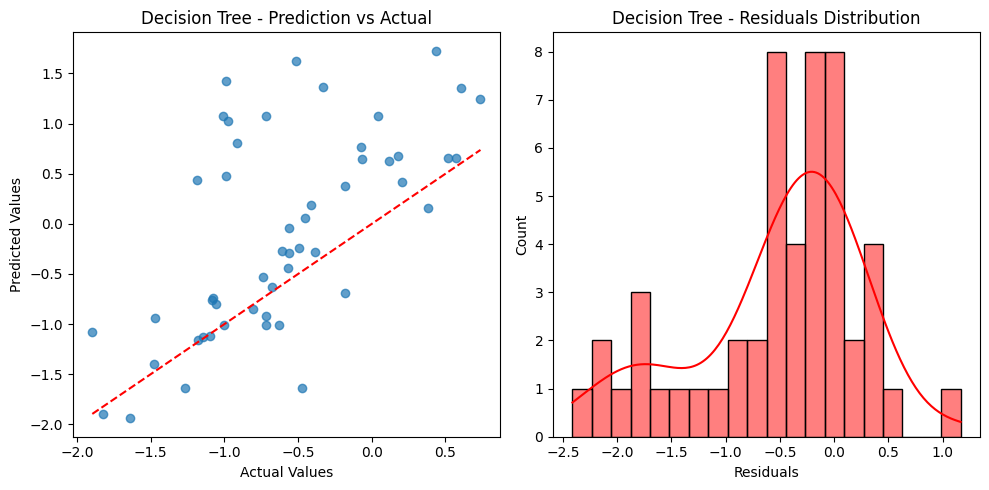

In [13]:
# Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print(f"Decision Tree Regression: MSE = {mse_dt:.4f}, R2 Score = {r2_dt:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Decision Tree - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Decision Tree - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Lasso Regression

/usr/local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e-01, tolerance: 5.089e-02
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: MSE = 0.6821, R2 Score = -0.7108


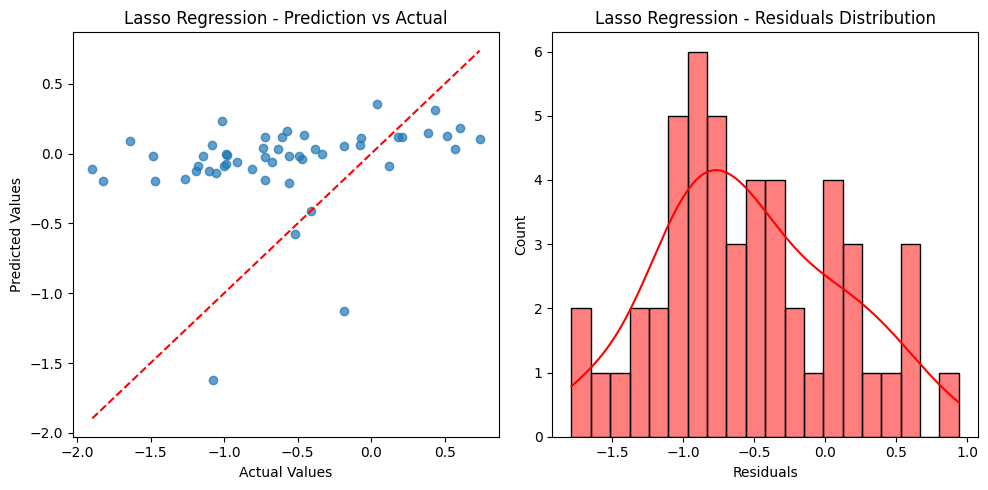

In [14]:
# Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"Lasso Regression: MSE = {mse_lasso:.4f}, R2 Score = {r2_lasso:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Lasso Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Lasso Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()


In [15]:
#feature addition

df['Ballot to Eligible Ratio'] = df['Total Ballots'] / df['Voting-Eligible Population (VEP)']
df.head()

,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Ballot to Eligible Ratio
1,Alabama,-6.459479e-18,-5.813531e-17,2000,-0.221326,3334576,1.5,26225,40178,5484,51798,2.626678e-16
2,Alaska,1.303009e+00,-8.173925e-01,2000,-0.857129,440296,3.4,4173,4779,525,7088,9.536397e-01
3,Arizona,-6.676200e-01,-2.856770e-01,2000,-0.195192,3816498,10.3,26510,59810,3474,59889,1.463567e+00
4,Arkansas,-6.459479e-18,-5.813531e-17,2000,-0.517701,2001774,2.3,11915,28409,8659,34779,1.122951e-16
5,California,2.337441e-01,3.721259e+00,2000,3.482699,24867252,18.8,163001,0,117647,280648,1.068499e+00


In [16]:
train_data = df[df['Year'] != 2022]  # Exclude 2022 for training
test_data = df[df['Year'] == 2022]   # Use 2022 for testing

# Scaling the target variable
scaler = MinMaxScaler()

# Features and target for training
target_column = 'Voter Turnout'
X_train = train_data.drop(columns=[target_column, 'Year', 'State'])
y_train = train_data[target_column]

# Features and target for testing
X_test = test_data.drop(columns=[target_column, 'Year', 'State'])
y_test = test_data[target_column]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check data splits
print("Training Data Shape:",X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (561, 9)
Testing Data Shape: (51, 9)


In [17]:
results = []
mse_values = []
r2_values = []


Linear Regression: MSE = 0.4775, R2 Score = -0.1977


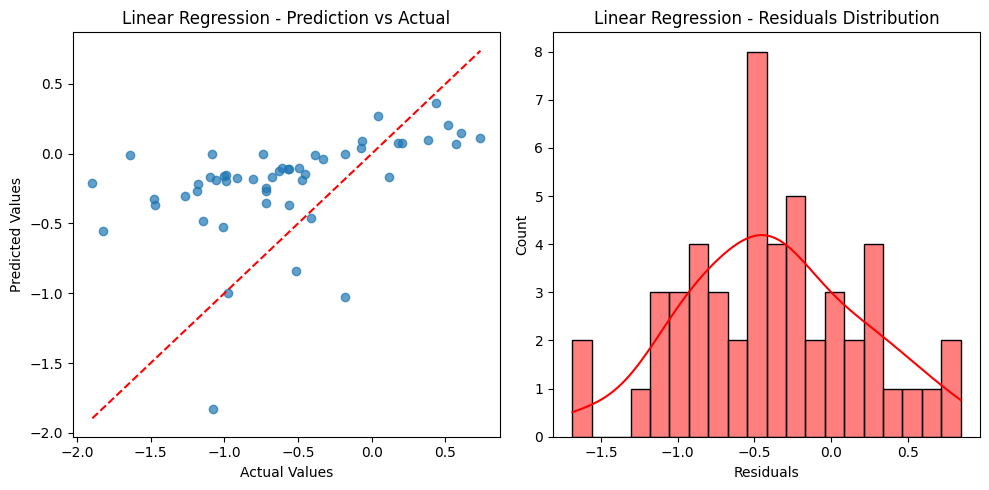

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f"Linear Regression: MSE = {mse_lr:.4f}, R2 Score = {r2_lr:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Linear Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Linear Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Linear Regression")
r2_values.append(r2_lr)
mse_values.append(mse_lr)


Ridge Regression: MSE = 0.4829, R2 Score = -0.2112


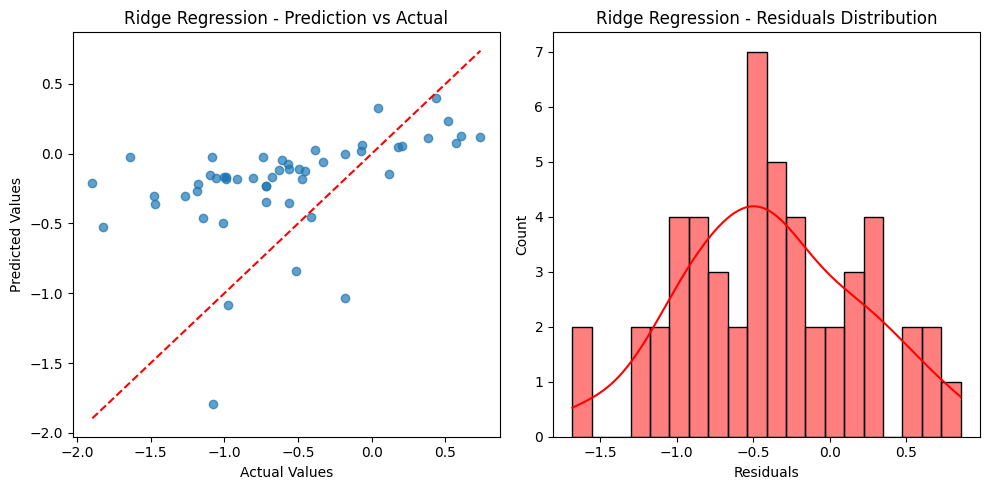

In [19]:
#Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"Ridge Regression: MSE = {mse_ridge:.4f}, R2 Score = {r2_ridge:.4f}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Ridge Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Ridge Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Ridge Regression")
r2_values.append(r2_ridge)
mse_values.append(mse_ridge)

Random Forest Regression: MSE = 0.0359, R2 Score = 0.9098


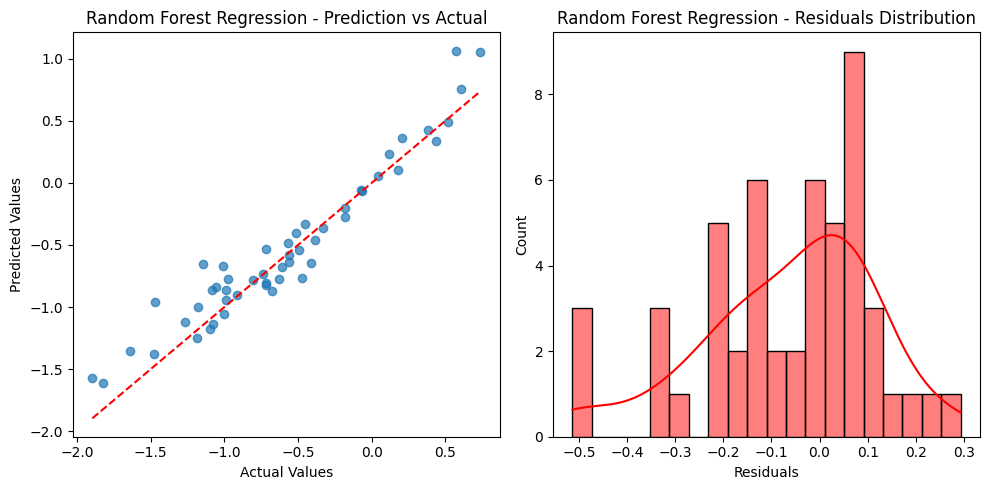

In [20]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Regression: MSE = {mse_rf:.4f}, R2 Score = {r2_rf:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Random Forest Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Random Forest Regression")
r2_values.append(r2_rf)
mse_values.append(mse_rf)

Decision Tree Regression: MSE = 0.0874, R2 Score = 0.7808


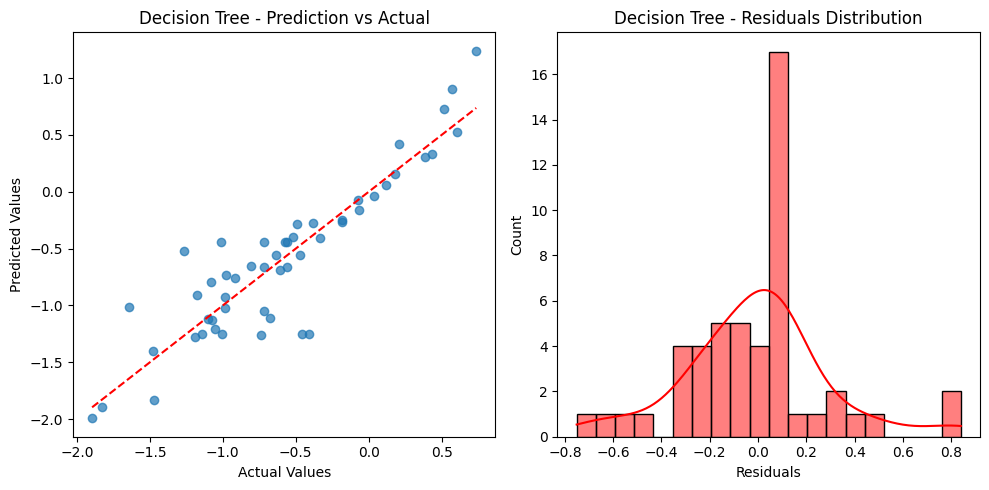

In [21]:
# Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print(f"Decision Tree Regression: MSE = {mse_dt:.4f}, R2 Score = {r2_dt:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Decision Tree - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Decision Tree - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Decision Tree Regression")
r2_values.append(r2_dt)
mse_values.append(mse_dt)

/usr/local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.271e-01, tolerance: 5.089e-02
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: MSE = 0.6814, R2 Score = -0.7091


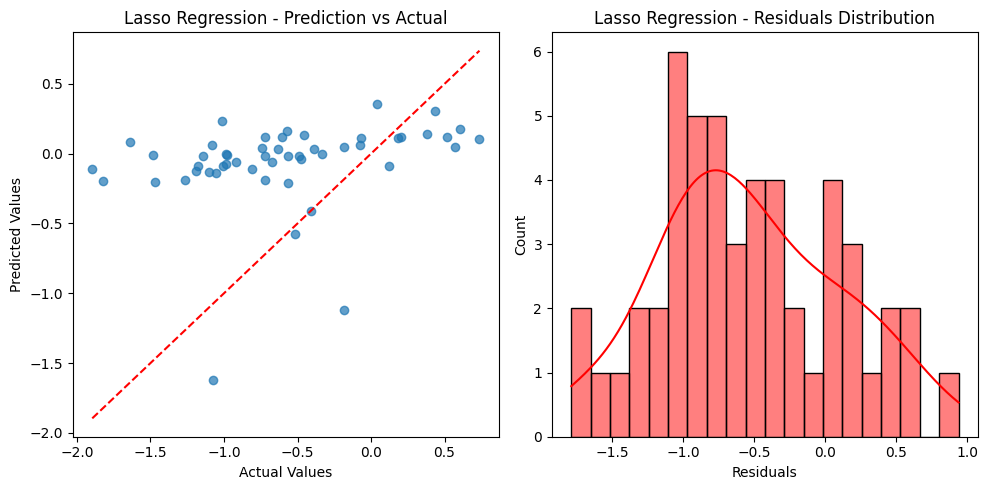

In [22]:
# Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"Lasso Regression: MSE = {mse_lasso:.4f}, R2 Score = {r2_lasso:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Lasso Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Lasso Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Lasso Regression")
r2_values.append(r2_lasso)
mse_values.append(mse_lasso)

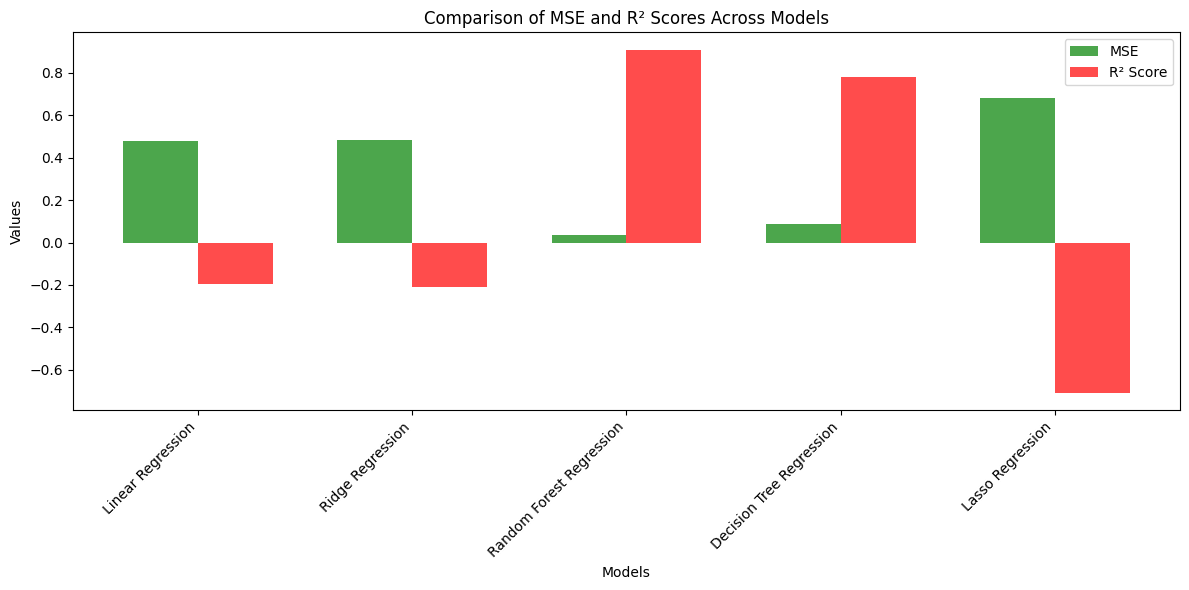

In [23]:

# Ensure that results, mse_values, and r2_values have matching lengths
assert len(results) == len(mse_values) == len(r2_values), "Mismatch in the lengths of results, mse_values, and r2_values"

# Plot comparison of R² and MSE values
x = np.arange(len(results))  # Positions for the bars
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))

# MSE bar plot
plt.bar(x - width/2, mse_values, width, label='MSE', color='green', alpha=0.7)

# R² bar plot
plt.bar(x + width/2, r2_values, width, label='R² Score', color='red', alpha=0.7)

# Add labels and title
plt.xticks(x, results, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of MSE and R² Scores Across Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()